In [503]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [538]:
sns.set_theme(style="whitegrid")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow")
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS")
path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")

#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 

# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 

In [505]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results.head()

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99992600123,ELECTROLYSIS,30000,0.74,10000000,1.183890e+11,7.801628e+09,1.621960e+08,NaN,-1.105873e+11


In [506]:
generation_data.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,electrolysis_hydrogen_generation
0,69110.813,0.0,0.0,0.0,0.0,0.0,18560.0,13734.4
1,69019.813,0.0,0.0,0.0,0.0,0.0,18560.0,13734.4
2,68759.313,0.0,0.0,0.0,0.0,0.0,18560.0,13734.4
3,68492.813,0.0,0.0,0.0,0.0,0.0,18560.0,13734.4
4,68239.313,0.0,0.0,0.0,0.0,0.0,18560.0,13734.4


<AxesSubplot:>

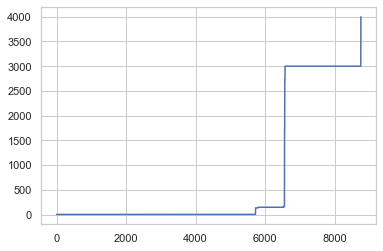

In [507]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
#sorted_elec_prices.plot()
sorted_elec_prices.sort_values(ignore_index=True).plot()

In [508]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,69110.813,3.0,192174.439
1,1,946083603,69019.813,3.0,190835.439
2,1,946087203,68759.313,3.0,188753.939
3,1,946090803,68492.813,3.0,186498.439
4,1,946094403,68239.313,3.0,184645.939


In [509]:
storage_levels_data.head()
storages_results["InstalledPowerInMW"].sum()

99000

In [510]:
electrolysers_results

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99992600123,ELECTROLYSIS,30000,0.74,10000000,1.183890e+11,7.801628e+09,1.621960e+08,NaN,-1.105873e+11


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='value'>

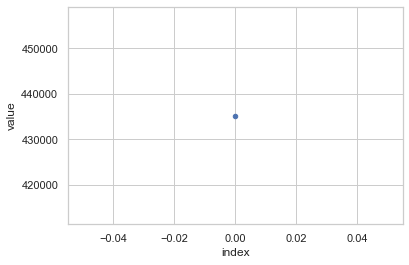

In [511]:
#storage_levels_data["value"][1:].plot.scatter() # 
storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')

In [512]:
production = storages_results['PRODUCTION_IN_MWH'].sum()
discharging = generation_data["storages_discharging"].sum()
charging = generation_data["storages_charging"].sum()
print("production/discharging "+ str(production/discharging) )
discharging/charging

production/discharging 0.9999999999999998


0.7365905523402472

In [513]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={1: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,load
0,69110.813,0.0,0.0,0.0,0.0,0.0,18560.0,50550.813
1,69019.813,0.0,0.0,0.0,0.0,0.0,18560.0,50459.813
2,68759.313,0.0,0.0,0.0,0.0,0.0,18560.0,50199.313
3,68492.813,0.0,0.0,0.0,0.0,0.0,18560.0,49932.813
4,68239.313,0.0,0.0,0.0,0.0,0.0,18560.0,49679.313


In [514]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

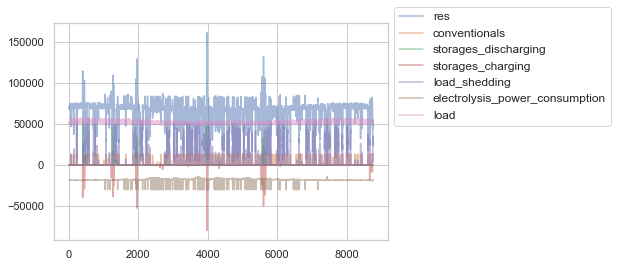

In [515]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

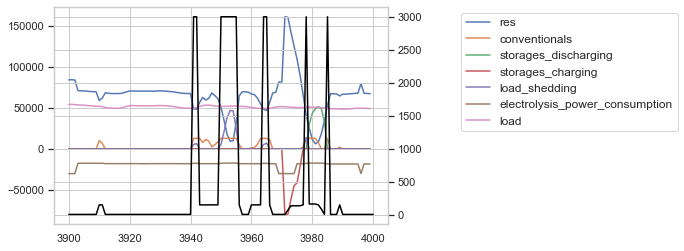

In [536]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation.iloc[3900:4000,0:7].plot( ax=ax1, alpha=0.95)
#ax1.plot(load_generation.iloc[8740:8760,0:5] , alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[3900:4000] , color = "black")

# plt.stackplot(load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_charging,
#               labels=['RES', 'conventional', "load shedding", "dish", "charg"])
#load_generation.plot.stackplot(alpha=0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


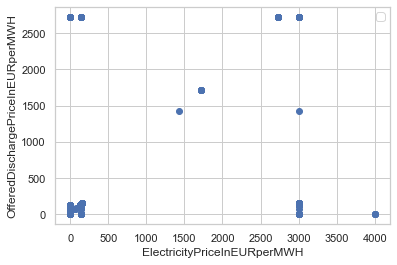

In [517]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
# storages_bids_charge = storages_raw[[ "OfferedChargePriceInEURperMWH", "OfferedDischargePriceInEURperMWH"] ].dropna()
storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
storages_bids_discharge.reset_index(drop=True, inplace = True)
storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
storages_bids_charge.reset_index(drop=True, inplace = True)
#storages_bids_charge.sort_values(ignore_index=True).plot()
#elec_prices_data["ElectricityPriceInEURperMWH"].sort_values(ignore_index=True).plot()
plt.scatter(x = ElectricityPriceInEURperMWH , y= storages_bids_discharge )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("OfferedDischargePriceInEURperMWH")
plt.savefig(path_to_plots + '/' + 'BidBatteriesvsPricesTimeseries.png', bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


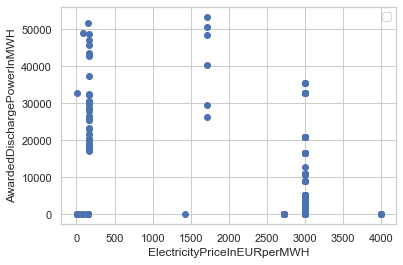

In [539]:
AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("AwardedDischargePowerInMWH")
plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


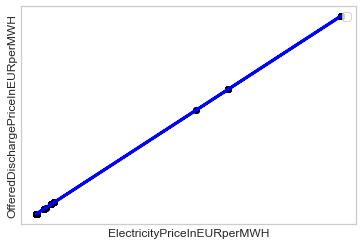

Coefficients: 
 [[1.]]


In [520]:
x = storages_bids_discharge.values.reshape(-1,1)
y = storages_bids_charge.values.reshape(-1,1)
regr = LinearRegression()
regr.fit(x, y)
fig = plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("OfferedDischargePriceInEURperMWH")
plt.legend()
plt.show()
print("Coefficients: \n", regr.coef_)

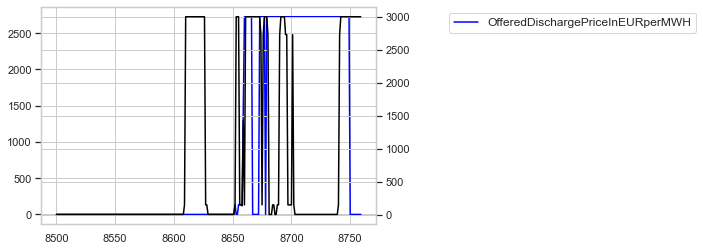

In [521]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages_bids_discharge.loc[8500:8760].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8500:8760] , color = "black")

<AxesSubplot:>

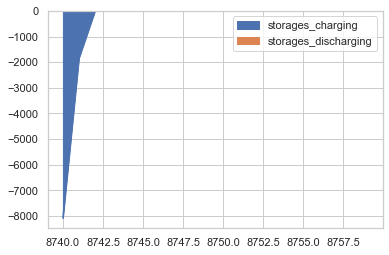

In [540]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()
storages.iloc[8740:8760,:].plot.area()


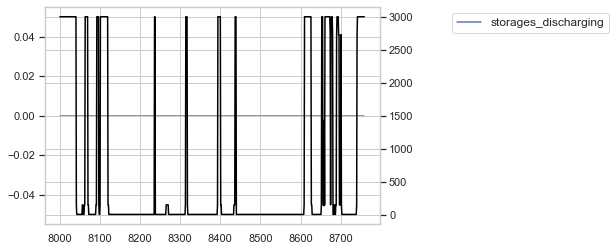

In [523]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages.iloc[8000:8760,1:7].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8760] , color = "black")

<AxesSubplot:>

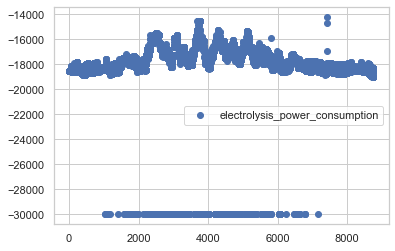

In [524]:
# just for information
#conversion_factor = load_generation.electrolysis_hydrogen_generation/load_generation.electrolysis_power_consumption = 0.8
electrolysisPowerConsumptioninMW = load_generation[["electrolysis_power_consumption"]].copy()
electrolysisPowerConsumptioninMW.plot( linestyle = 'None', marker= "o")

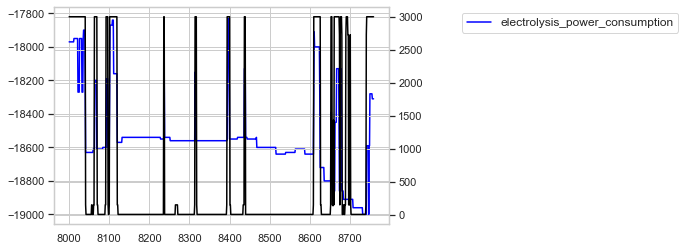

In [543]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
electrolysisPowerConsumptioninMW = electrolysisPowerConsumptioninMW*-1
electrolysisPowerConsumptioninMW.loc[8000:8760].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8760] , color = "black")
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

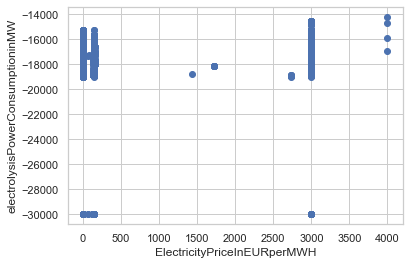

In [545]:
x = ElectricityPriceInEURperMWH.values.reshape(-1,1)
y = electrolysisPowerConsumptioninMW.values.reshape(-1,1)
fig = plt.scatter(x, y)
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("electrolysisPowerConsumptioninMW")

plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

<AxesSubplot:>

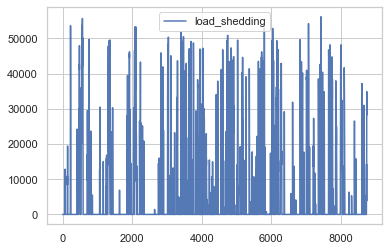

In [542]:
load_generation[["load_shedding"]].plot( alpha=0.95)

In [528]:
conventionals_join
#conventionals_join.loc[conventionals_join['FuelType'] =="HYDROGEN"]

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20510100081,BIOMASS,2.0,0.309,1000,1000,4.326493e+08,6.703682e+09,NaN,2.930611e+06,6.271032e+09
1,20510100093,BIOMASS,2.0,0.309,1000,1000,4.249788e+08,6.696011e+09,NaN,2.878654e+06,6.271032e+09
2,20510100092,BIOMASS,2.0,0.309,1000,1000,4.170087e+08,6.688041e+09,NaN,2.824668e+06,6.271032e+09
3,20510100090,BIOMASS,2.0,0.309,1000,1000,4.077220e+08,6.678754e+09,NaN,2.761763e+06,6.271032e+09
4,20510100089,BIOMASS,2.0,0.309,1000,1000,3.991295e+08,6.670162e+09,NaN,2.703560e+06,6.271032e+09
5,20510100088,BIOMASS,2.0,0.309,1000,1000,3.904454e+08,6.661478e+09,NaN,2.644737e+06,6.271032e+09
6,20510100091,BIOMASS,2.0,0.309,1000,1000,3.812581e+08,6.652290e+09,NaN,2.582506e+06,6.271032e+09
7,20510100086,BIOMASS,2.0,0.309,1000,1000,3.723021e+08,6.643334e+09,NaN,2.521841e+06,6.271032e+09
8,20510100085,BIOMASS,2.0,0.309,1000,1000,3.655974e+08,6.636630e+09,NaN,2.476426e+06,6.271032e+09
9,20510100084,BIOMASS,2.0,0.309,1000,1000,3.584790e+08,6.629511e+09,NaN,2.428209e+06,6.271032e+09


In [529]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation

In [530]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,20512600142,STORAGE,5,0.92,0.92,0,99000


In [531]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()